In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
import torch.nn.functional as F
from PIL import Image

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=41)

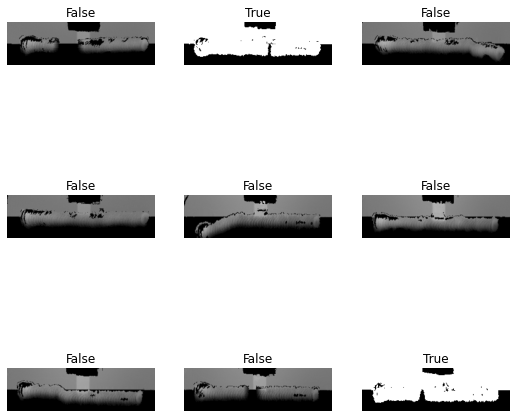

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = cnn_learner(dls, models.resnet34,normalize=True,pretrained=True,
                    metrics=[accuracy, precision, f1],opt_func=Adam)

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=1.0964781722577754e-06)

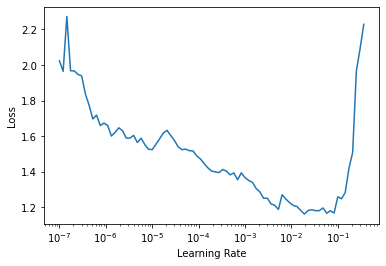

In [6]:
learn.lr_find()

In [7]:
learn.fit(5, lr=2e-03)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.269734,0.131270,0.961151,0.828685,0.885106,00:20
1,0.129166,0.087160,0.977698,0.931193,0.929062,00:20
2,0.150118,0.123427,0.976978,0.915556,0.927928,00:20
3,0.095234,0.084932,0.982734,0.941176,0.945455,00:20
4,0.111284,0.057855,0.982734,0.901235,0.948052,00:20


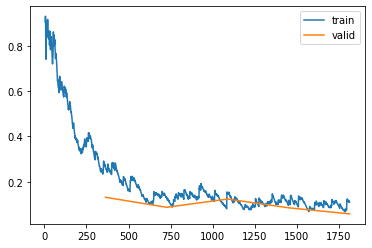

In [8]:
learn.recorder.plot_loss()

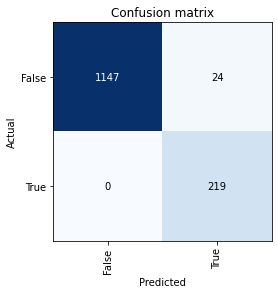

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()